# 🚗 Craigslist Car Listings - Explore and Clean the data


After scraping Craiglist in the previous notebook, we are now going to **explore**, **clean** and **analyse** the **data collected**.

## Import the dataset

Let's have a quick **overview of the dataset** to see what are we dealing with.

In [3]:
import pandas as pd

df = pd.read_csv("../data/all-vehicles-model__enriched.csv")
df = df.drop_duplicates(subset='url')

df.head()

,url,title,price,location,year,makemodel,condition,cylinders,drive,fuel,...,Fuel Type1,Transmission,Vehicle Size Class,Unrounded Combined Mpg For Fuel Type1,Annual Fuel Cost For Fuel Type1,GHG Score,Unrounded Highway Mpg For Fuel Type1,ATV Type,Electric motor,Start-Stop
0,https://atlanta.craigslist.org/atl/ctd/d/2010-...,2010 Acura TSX Leather! NAV! SunRoof! TINT! $9...,$999,Marietta,2009.0,ACURATSX,like new,4 cylinders,fwd,gas,...,Premium Gasoline,Automatic (S5),Compact Cars,0.0000,2700.0,NaN,0.0000,NaN,NaN,NaN
2,https://atlanta.craigslist.org/atl/ctd/d/2012-...,2012 Acura TL Leather! SunRoof! $1500 DOWN! N...,"$1,500",Marietta,2012.0,ACURATL,good,6 cylinders,fwd,gas,...,Premium Gasoline,Automatic (S6),Midsize Cars,21.1028,3200.0,NaN,25.8687,NaN,NaN,NaN
4,https://atlanta.craigslist.org/atl/ctd/d/2012-...,2012 Acura TL Leather! SunRoof! $999 DOWN! NO...,$999,Marietta,2014.0,ACURATL,good,6 cylinders,fwd,gas,...,Premium Gasoline,Automatic (S6),Midsize Cars,21.1028,3200.0,5.0,25.8687,NaN,NaN,N
6,https://atlanta.craigslist.org/atl/ctd/d/2012-...,2012 FORD FUSION SE! CLEAN!! SunRoof! $699 DOW...,$699,Marietta,2007.0,FORDFUSIONSE,like new,4 cylinders,fwd,gas,...,Regular Gasoline,Automatic 6-spd,Midsize Cars,0.0000,2550.0,NaN,0.0000,NaN,NaN,NaN
9,https://atlanta.craigslist.org/atl/ctd/d/2012-...,2012 Honda Accord EX-L $889 DN! LEATHER! ROOF!...,$899,Marietta,2012.0,HONDAACCORD4DOORSEDAN,like new,4 cylinders,fwd,gas,...,Regular Gasoline,Manual 5-spd,Large Cars,26.6234,2000.0,NaN,32.7688,NaN,NaN,NaN


#### Type of seller

By inspecting the structure of the listing URLs, I noticed a consistent pattern that allows us to infer whether a post was created by a **private owner** or a **dealer**.

The logic is based on the URL segment just before `/d/`, which typically follows one of these two formats:

- `cto` → **Owner**
- `ctd` → **Dealer**

This pattern can be extracted and mapped accordingly to create a new `seller` column in the dataset.


In [6]:
df.insert(2, 'seller', df['url'].str.extract(r'/([a-z]+)/d/')[0].map({'cto': 'owner', 'ctd': 'dealer'}))

#### Day of the listing

In [8]:
df['posted_at'] = pd.to_datetime(df['posted_at'], format="%Y-%m-%d", errors='coerce')

df['Day'] = df['posted_at'].dt.day_name()

In [9]:
df[["posted_at",'Day']].head()

,posted_at,Day
0,2025-06-13,Friday
2,2025-06-18,Wednesday
4,2025-06-13,Friday
6,2025-06-18,Wednesday
9,2025-07-03,Thursday


## Global Distribution and first filters

In [11]:
df.describe(include='all')

,url,title,seller,price,location,year,makemodel,condition,cylinders,drive,...,Transmission,Vehicle Size Class,Unrounded Combined Mpg For Fuel Type1,Annual Fuel Cost For Fuel Type1,GHG Score,Unrounded Highway Mpg For Fuel Type1,ATV Type,Electric motor,Start-Stop,Day
count,128019,128018,127991,119851,111892,128017.000000,128015,74105,91947,97375,...,68877,68877,68877.000000,68877.000000,46796.000000,68877.000000,11896,5934,47933,128019
unique,128019,88921,2,12440,10215,NaN,17515,6,8,3,...,35,29,NaN,NaN,NaN,NaN,8,143,2,7
top,https://atlanta.craigslist.org/atl/ctd/d/2010-...,2023 Toyota Camry SE Sedan,dealer,"$6,500",Est. payment OAC†,NaN,FORDF150,excellent,4 cylinders,4wd,...,Automatic (S6),Midsize Cars,NaN,NaN,NaN,NaN,FFV,202V Ni-MH,N,Friday
freq,1,59,93560,994,1770,NaN,2448,43832,35044,44237,...,9767,11495,NaN,NaN,NaN,NaN,4229,1047,30881,24146
mean,NaN,NaN,NaN,NaN,NaN,2012.561652,NaN,NaN,NaN,NaN,...,NaN,NaN,20.747609,2575.270410,5.434396,23.762510,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,14.857300,2050.000000,4.000000,17.802500,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,21.453700,2550.000000,5.000000,25.608400,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,26.476300,3050.000000,7.000000,31.863100,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2026.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,140.560300,6100.000000,10.000000,140.137600,NaN,NaN,NaN,NaN


The `describe()` method provides valuable insights into the dataset:

- We have a total of **128,019 unique listings**.  
  All of them have a `title`, but titles may be redundant or duplicated.  
  → We'll use the `URL` **as a unique identifier** for each listing.

- The `condition` column has **many missing values**.  
  Approximately **40%** of the listings do **not** provide this information.

- The **`top` row** indicates the most frequently occurring value for each column.  
  It highlights that, out of 128,019 listings:

  - **43,832 cars** are rated as **_"excellent"_** condition.  
  - **30,351 cars** are **_"white"_**.  
  - **44,237 cars** have **_"4wd"_** drivetrain.  
  - **35,044 cars** are equipped with a **_"4 cylinders"_** engine.  
  - **37,439 listings** are **SUVs**.  
  - Over 100K cars:
    - Use **_"gas"_** as fuel  
    - Have an **_"automatic"_** transmission  
    - Hold a **_"clean"_** title.
    


- Aside from `year`, all features are currently interpreted as text.  
  To perform proper analysis, we'll need to convert the following columns to numeric types:
  - `price`  
  - `odometer`

In [13]:
df['price'] = pd.to_numeric(df['price'].str.replace(r'[\$,]', '', regex=True).replace('', pd.NA), errors='coerce').astype('Int64')
df['odometer'] = pd.to_numeric(df['odometer'].str.replace(r'[\,]', '', regex=True).replace('', pd.NA), errors='coerce').astype('Int64')
df['age'] = 2025 - df['year'] 

Let's define a **quick way to explore** how a **number** (like price or mileage) behaves across different **categories** (like car color or engine).

- Groups the data by a category we choose (`col1`)
- Calculates an average (or median, sum, etc.) of a number column (`col2`)
- Plots:
  - A **bar chart** showing the aggregated value for each category
  - A **line chart** showing how many listings fall into each category

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_and_count_line(df, col1, col2, agg_func='mean'):
    """
    Plots a bar chart of an aggregated numeric column (col2) and a line chart
    representing the count of each category in col1.

    Parameters:
    - df: pandas DataFrame
    - col1: str, categorical column (used as x-axis)
    - col2: str, numerical column to aggregate (bar chart)
    - agg_func: str, aggregation function for col2 (e.g. 'mean', 'median', 'sum')
    """
    grouped = df.groupby(col1).agg(
        aggregated_value=(col2, agg_func),
        count=(col2, 'count')
    ).sort_values('aggregated_value', ascending=False)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color1 = 'tab:blue'
    ax1.set_xlabel(col1)
    ax1.set_ylabel(f"{agg_func.title()} of {col2}", color=color1)
    sns.barplot(x=grouped.index, y=grouped['aggregated_value'], ax=ax1)
    ax1.tick_params(axis='y', labelcolor=color1)
    plt.setp(ax1.get_xticklabels(), rotation=45)

    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel(f"Count of cars", color=color2)
    sns.lineplot(x=grouped.index, y=grouped['count'], ax=ax2, color=color2, marker='o')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f"{agg_func.title()} of {col2} and count of cars")
    plt.tight_layout()
    plt.show()

- It helps spot which categories are common vs. rare
- Lets you see which groups are more expensive, cheaper, etc.
- Great for data exploration and figuring out if a column is useful, noisy, or unbalanced

We can use it to see the **average price by city**:

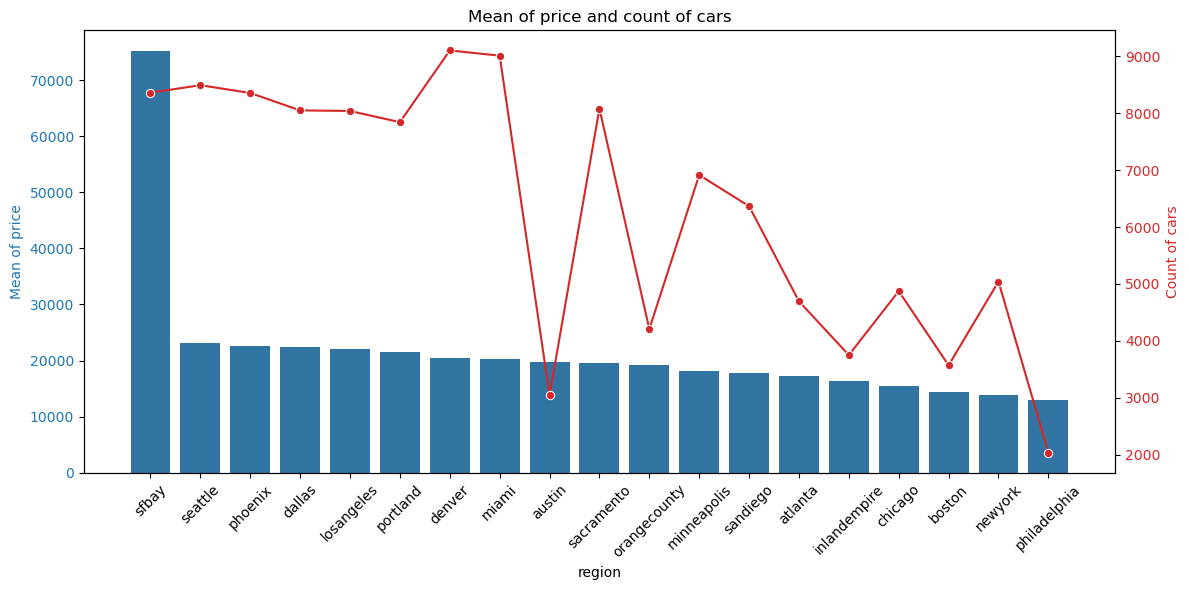

In [17]:
plot_bar_and_count_line(df, col1='region', col2='price', agg_func='mean')

We can see that the **average price** is way to big for *San Francisco*. Let's check the **median**.

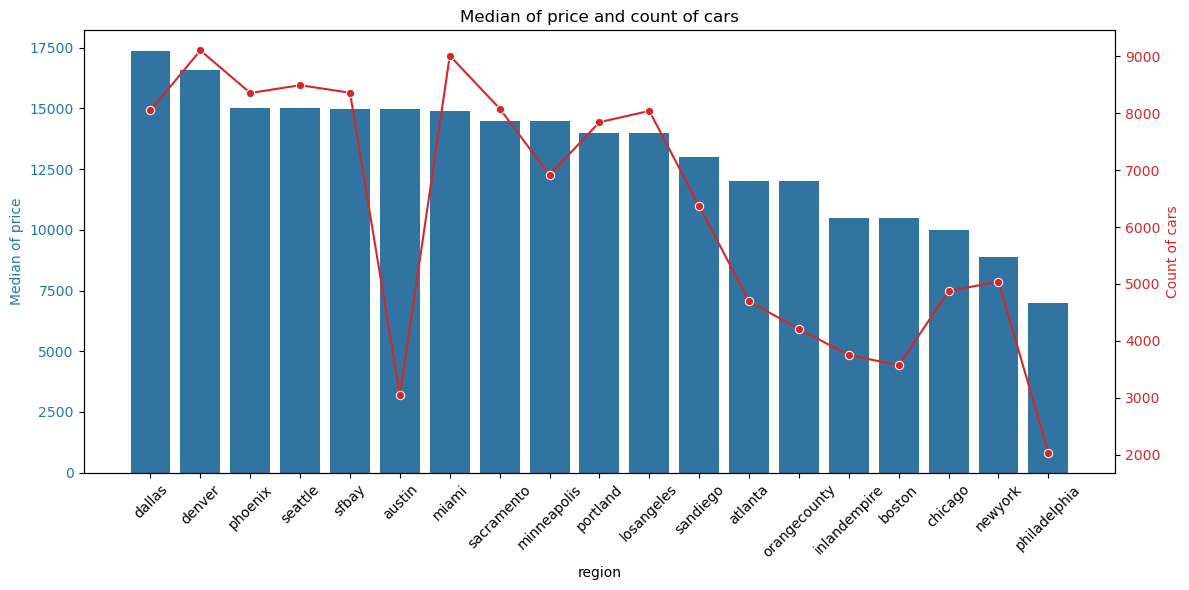

In [19]:
plot_bar_and_count_line(df, col1='region', col2='price', agg_func='median')

The **median** seems normal, we can have a look at the highest price for San Francisco and try to understand what is behind.

In [21]:
df[df['region'].str.lower() == 'sfbay'].sort_values('price', ascending=False).head(10)

,url,title,seller,price,location,year,makemodel,condition,cylinders,drive,...,Vehicle Size Class,Unrounded Combined Mpg For Fuel Type1,Annual Fuel Cost For Fuel Type1,GHG Score,Unrounded Highway Mpg For Fuel Type1,ATV Type,Electric motor,Start-Stop,Day,age
215125,https://sfbay.craigslist.org/sfc/ctd/d/hayward...,All hond toyota Nissan all makes admodels. We ...,dealer,123456789,2000 2001 2002 2003 2004 2005 2006 2007 2008 2...,2007.0,HONDATOYOTANISSANACCORDCAMRYCIVICCRV,NaN,NaN,NaN,...,Midsize Cars,0.0000,2350.0,NaN,0.0000,NaN,NaN,NaN,Tuesday,18.0
215122,https://sfbay.craigslist.org/sfc/ctd/d/hayward...,All hond toyota Nissan all makes admodels. We ...,dealer,123456789,2000 2001 2002 2003 2004 2005 2006 2007 2008 2...,2007.0,HONDATOYOTANISSANACCORDCAMRYCIVICCRV,NaN,NaN,NaN,...,Midsize Cars,0.0000,2350.0,NaN,0.0000,NaN,NaN,NaN,Thursday,18.0
208924,https://sfbay.craigslist.org/nby/cto/d/santa-r...,1960 Chevy Impala Convertible,owner,123456789,santa rosa,1960.0,CHEVYIMPALA,good,8 cylinders,rwd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,65.0
209877,https://sfbay.craigslist.org/pen/cto/d/mountai...,"Wanted. Mazda rx2,rx3,rx4,pick up,REPU Cosmo",owner,99999999,mountain view,1972.0,MAZDA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,53.0
202079,https://sfbay.craigslist.org/eby/ctd/d/concord...,2017 Lamborghini Aventador LP 750-4 SV * RYFT ...,dealer,455888,NaN,2017.0,LAMBORGHINIAVENTADORLP7504SVRYFTWHITEROADSTER,NaN,12 cylinders,4wd,...,Two Seaters,13.1199,5200.0,1.0,18.4729,NaN,NaN,Y,Friday,8.0
209311,https://sfbay.craigslist.org/pen/ctd/d/mountai...,2022 MUSTANG GT PREMIUM 6SPEED ONLY 17K MILES,dealer,410000,mountain view,2022.0,FORDMUSTANG,like new,8 cylinders,rwd,...,Subcompact Cars,23.0000,2350.0,5.0,27.0000,NaN,NaN,N,Tuesday,3.0
211810,https://sfbay.craigslist.org/sby/ctd/d/san-jos...,RARE 2006 Ferrari 575 SuperAmerica | 575m 550m...,dealer,369991,san jose downtown,2006.0,FERRAREI575SUPERAMERICA,excellent,12 cylinders,rwd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,19.0
210522,https://sfbay.craigslist.org/sby/ctd/d/hollist...,2014 Ferrari 458 Spider BY CREATIVE BESPOKE | ...,dealer,289991,san jose downtown,2014.0,FERRARI458SPIDER,excellent,8 cylinders,rwd,...,Two Seaters,14.6199,4500.0,2.0,17.2473,NaN,NaN,Y,Friday,11.0
207128,https://sfbay.craigslist.org/eby/cto/d/union-c...,"Wanted classic vehicles, American European Por...",owner,250000,Union city,1967.0,FORDMUSTANGFASTBACK,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,58.0
211646,https://sfbay.craigslist.org/sby/ctd/d/san-jos...,2021 Porsche 911 Turbo S Cabriolet | Turbo Cab...,dealer,229888,san jose west,2021.0,PORSCHE911,NaN,NaN,4wd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,4.0


The first two rows appear to be clear anomalies.  
The remaining ones mostly correspond to genuinely expensive cars — brands like Ferrari, Lamborghini, Range Rover, McLaren, Rolls-Royce, etc.

To reduce noise and keep the dataset consistent, we’ll apply the following price filters:

* Remove all listings priced above **$1,000,000**

* Remove all listings priced below **$2,500**

---

Following the same logic as with price filtering, we’ll now apply additional rules to clean up the dataset:

- Remove all listings where the **year is not between 1985 and 2025**
- Remove all listings where the **odometer reading is above 350,000 miles** or **below 5 miles**
- Remove all the **non-cars** listings (bus, trucks...) as our analysis will be focused on the cars.

In [23]:
df = df[(df['price'] >= 2500) & (df['price'] < 1000000)]
df = df[(df['year'] >= 1985) & (df['year'] <= 2025)]
df = df[(df['odometer'] >= 5) & (df['odometer'] <= 350000)]
df = df[~df['type'].isin(["truck", "bus", "van"])]

I would like to apply another filter on all the **listings where we were not able to identify the Make/Model** but first let see how many rows will be impacted:

In [25]:
print(f"Number of row with missing info on the model : {df['model'].isna().sum()}")
print(f"Percentage : {(df['model'].isna().sum() / len(df)) * 100:.2f}%")

Number of row with missing info on the model : 4595
Percentage : 4.92%


I'm ok with removing 5% of the dataset to have a **better quality of data**, this will be more than helpful for the **creation of ML Models**.

In [27]:
df = df[~df['model'].isna()]

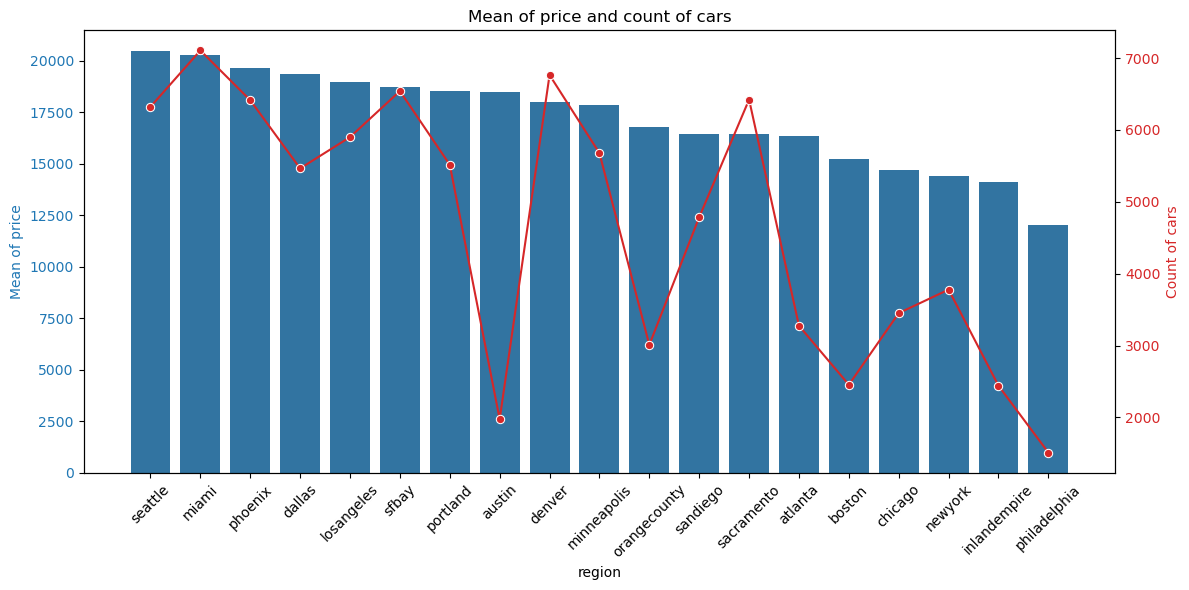

In [28]:
plot_bar_and_count_line(df, col1='region', col2='price', agg_func='mean')

When plotting again the average price by cities, we now have a **smooth distribution**.

Let's keep in mind that `austin`, `boston` and `philadelphia` have less than 5k listings.

## Distribution by Categorical columns

In [31]:
import matplotlib.pyplot as plt

def plot_top10_piecharts(df, text_cols):
    for col in text_cols:
        value_counts = df[col].value_counts()
        n_classes = len(value_counts)

        if n_classes > 20:
            top10 = value_counts.head(10)
            others_sum = value_counts.iloc[10:].sum()
            pie_data = top10.copy()
            if others_sum > 0:
                pie_data["Others"] = others_sum
        else:
            pie_data = value_counts

        total = len(df)
        n_missing = df[col].isna().sum()
        missing_pct = 100 * n_missing / total

        cmap = plt.get_cmap('tab20')
        colors = cmap.colors[:len(pie_data)]

    
        fig, ax = plt.subplots(figsize=(6, 6))
        pie_data.plot.pie(
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            counterclock=False,
            ax=ax
        )

        plt.suptitle(f"Distribution by '{col}'", fontsize=14)
        if missing_pct > 40:
            ax.set_title(f"{missing_pct:.1f}% of the dataset is missing the information on '{col}'", fontsize=8)

        ax.set_ylabel("")
        plt.tight_layout()
        plt.show()


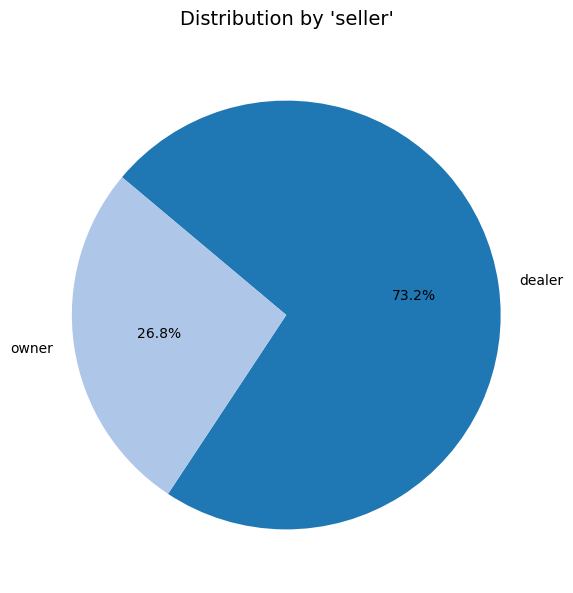

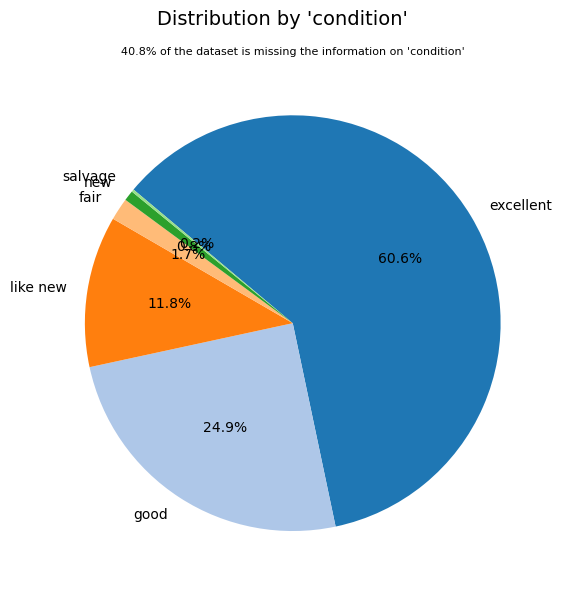

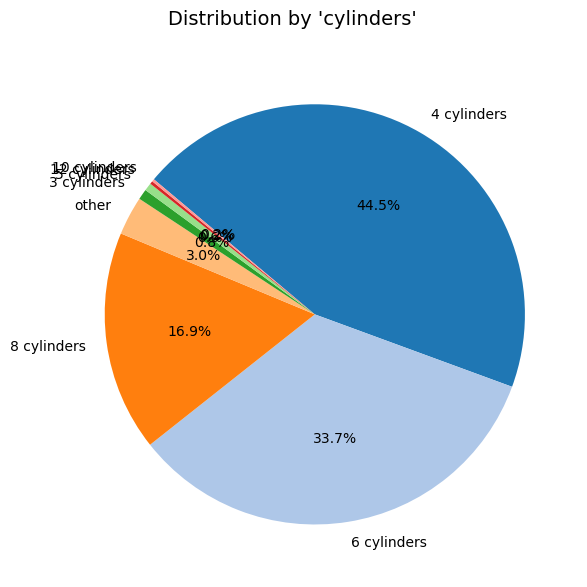

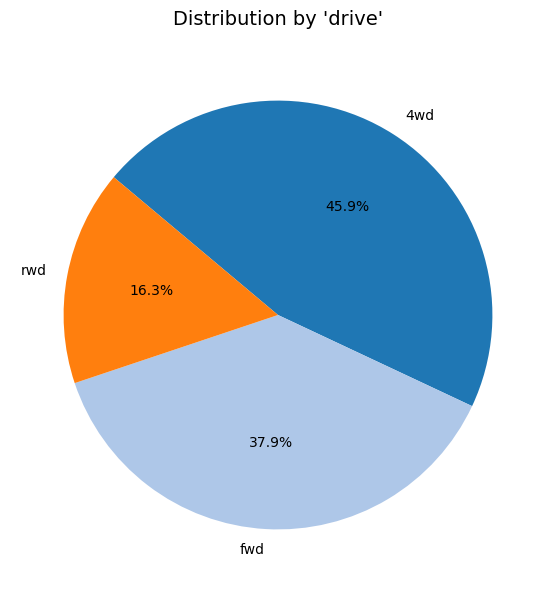

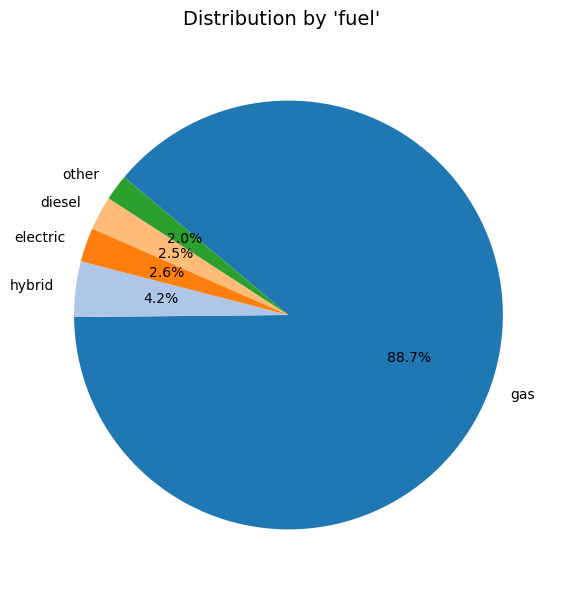

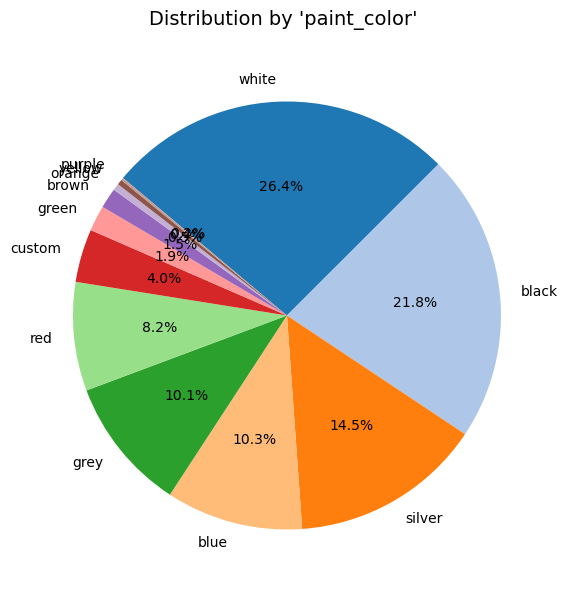

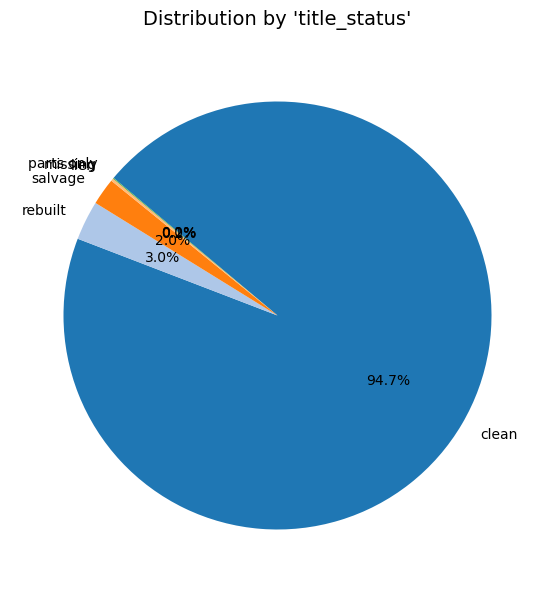

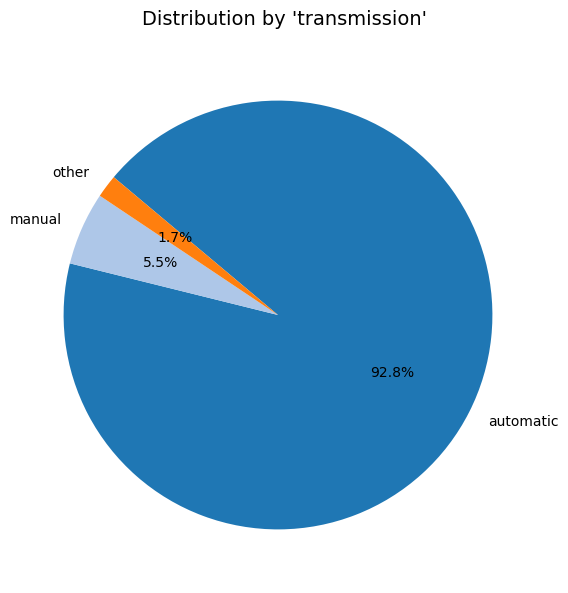

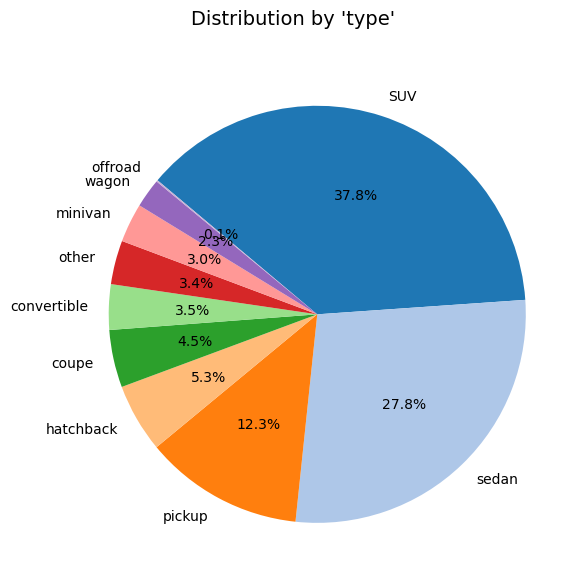

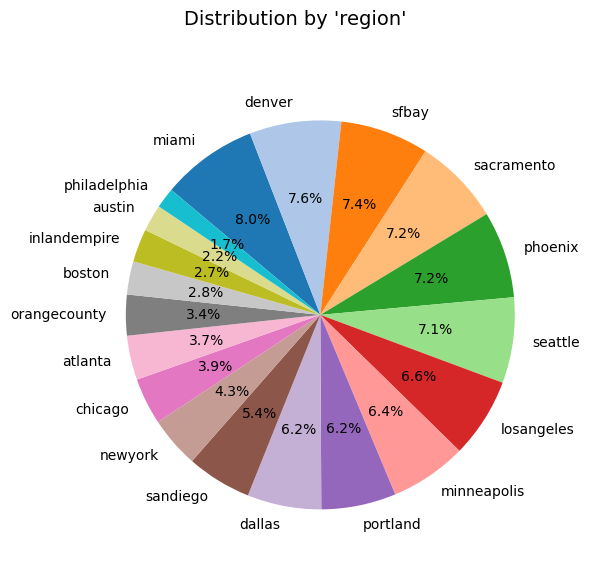

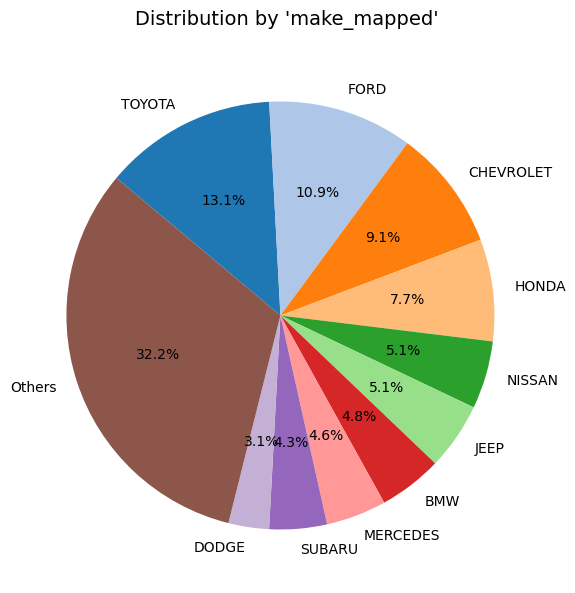

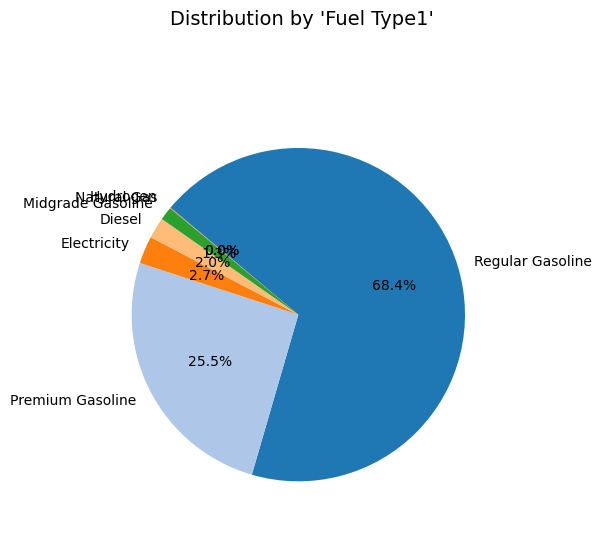

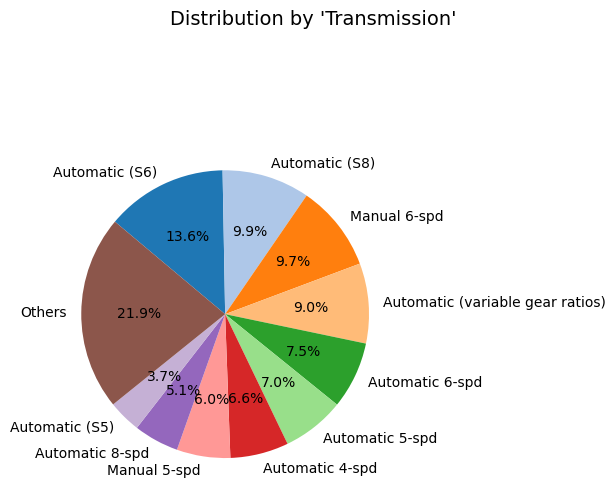

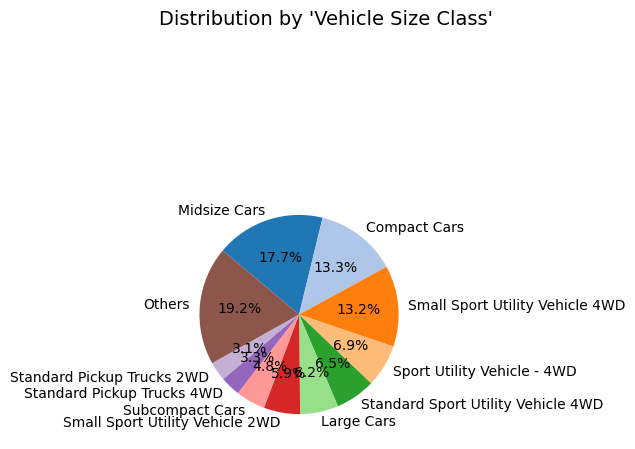

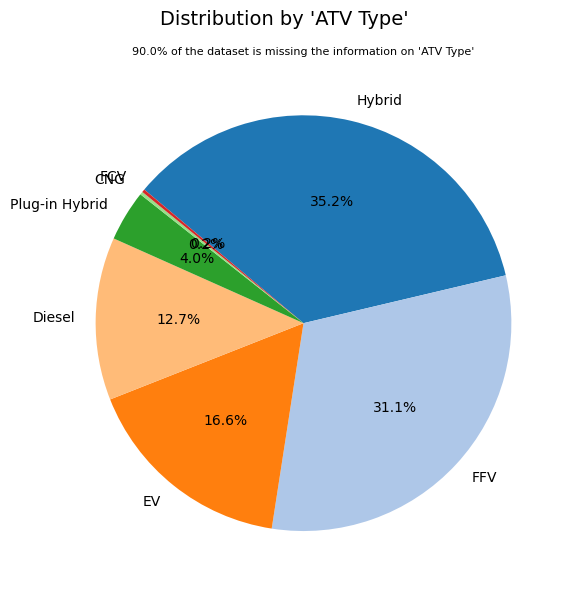

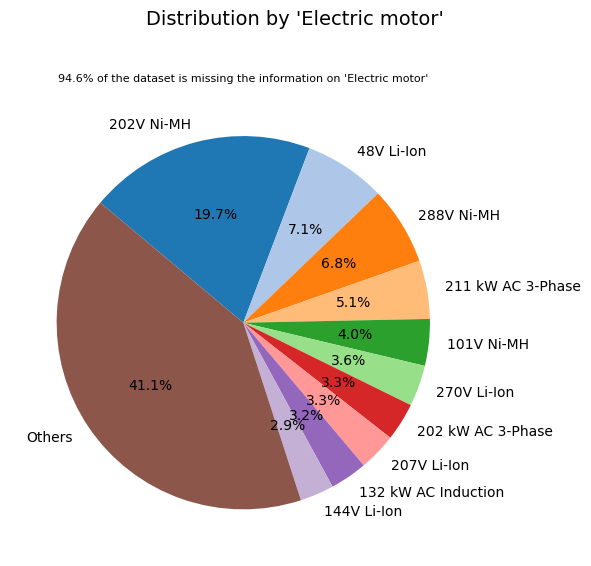

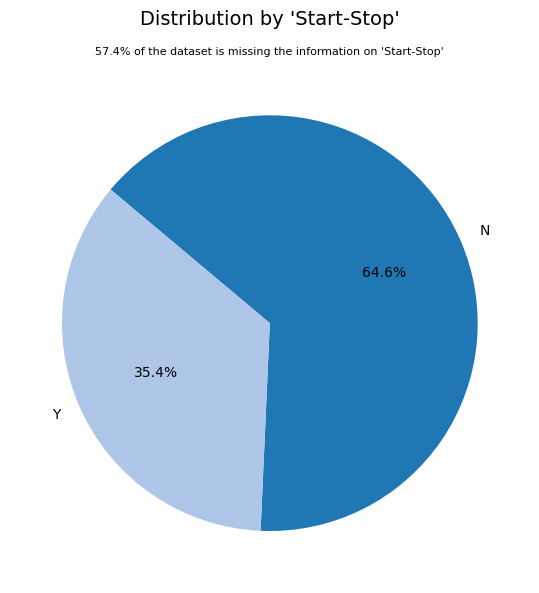

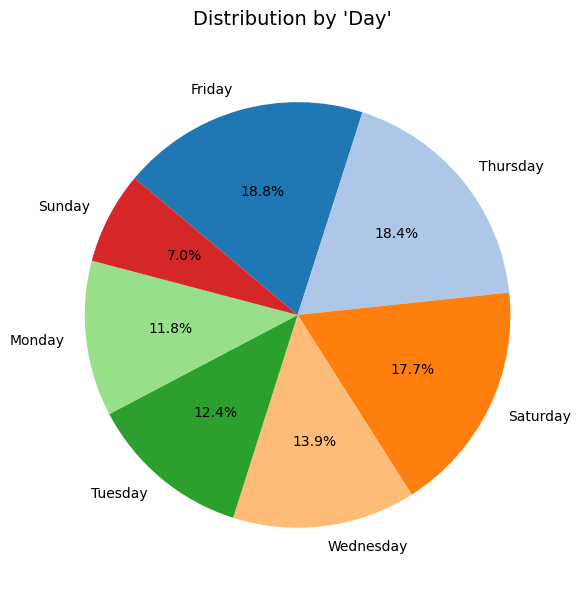

In [32]:
categorical_col = [col for col in df.select_dtypes(include=['object', 'string']).columns if col not in [
    'url',
    'title',
    'location',
    'makemodel',
    'makemodel_withoutmake',
    'specific_model',
    'model'
] ]
plot_top10_piecharts(df, categorical_col)

##### Day and Price

_Out of curiosity_, I want to this if there is any intersting relation between the **price of a listing** and the **day of the week**.

---

Let's start by computing the **ANOVA table** and the **Eta²**.

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(Day)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"Anova table: \n{anova_table}\n\n")

ss_between = anova_table.loc['C(Day)', 'sum_sq']
ss_total = anova_table['sum_sq'].sum()

eta_squared = ss_between / ss_total
print(f"Eta squared: {eta_squared:.4f}")


Anova table: 
                sum_sq       df          F        PR(>F)
C(Day)    6.683448e+10      6.0  31.487379  4.743020e-38
Residual  3.141560e+13  88804.0        NaN           NaN


Eta squared: 0.0021


The **p-value is close to 0** which means that we have a **significant relation** between the Price and the day of the publication.
But when we look at the **Eta²**, it **is very low** (0.21%). The **relation has a negligeable impact**.

Finally, let's visualize this with the **Boxplots**:

<Axes: xlabel='Day', ylabel='price'>

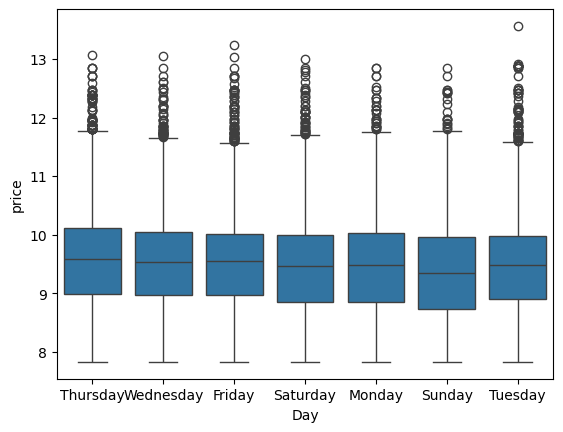

In [37]:
import seaborn as sns
import numpy as np
sns.boxplot(x=df["Day"], y=np.log(df["price"]+1), data=df)

No matter the day of the week, the distribution looks the same.

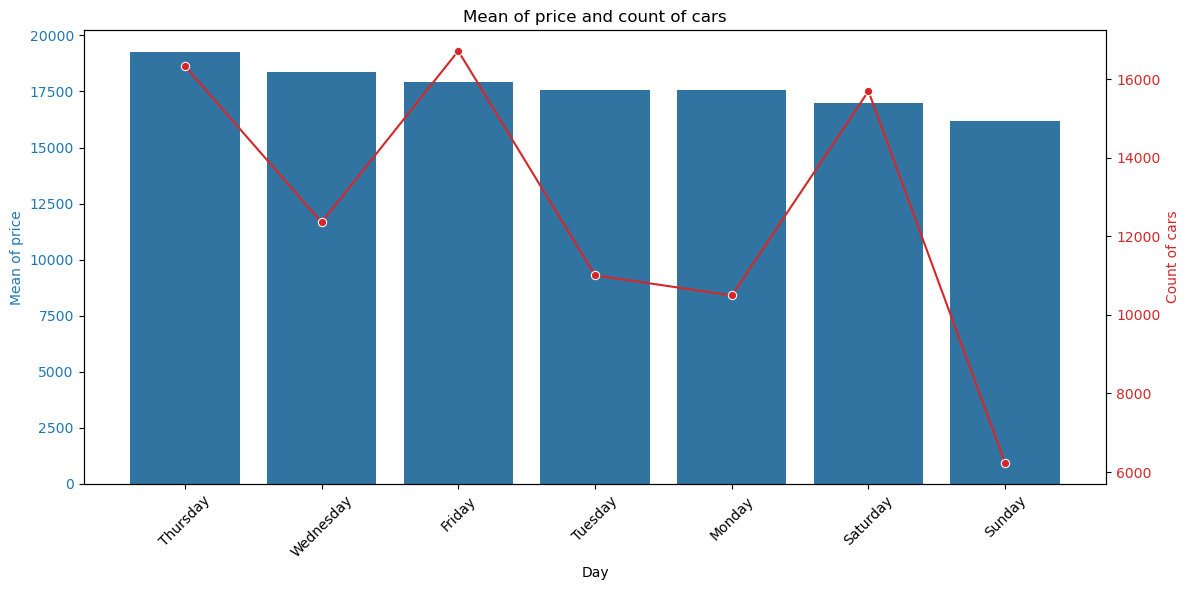

In [39]:
plot_bar_and_count_line(df, col1='Day', col2='price', agg_func='mean')

Even when looking at the mean, there is no specific relation. Nonetheless, we observe that there are a very **few listings are posted on a Sunday**.

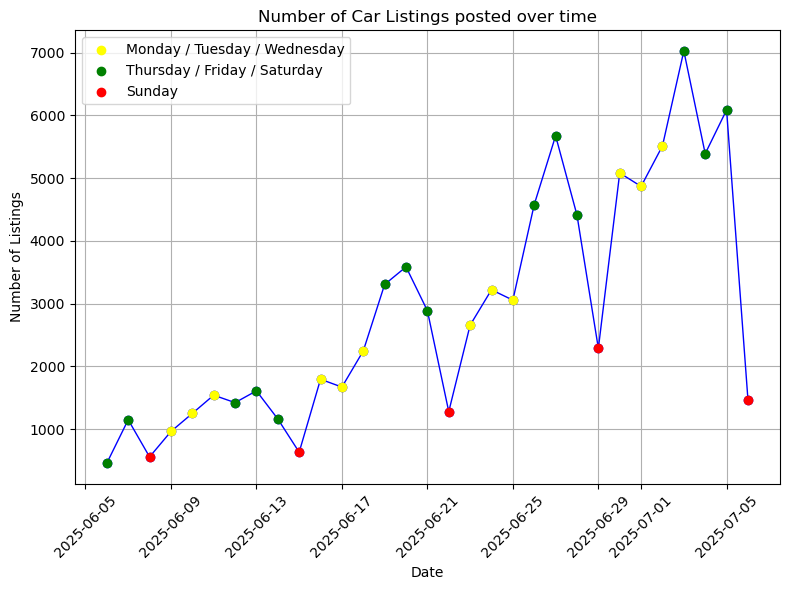

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df['posted_at'] = pd.to_datetime(df['posted_at'])

df['date'] = df['posted_at'].dt.date
df['Day'] = df['posted_at'].dt.day_name()

grouped = df.groupby(['date', 'Day'])['price'].count().reset_index(name='nb_listings')

plt.figure(figsize=(8, 6))
plt.plot(grouped['date'], grouped['nb_listings'], marker='o', color='blue', linewidth=1)

mondays_tuesdays_wednesdays = grouped[(grouped['Day'] == 'Monday') | (grouped['Day'] == 'Tuesday') | (grouped['Day'] == 'Wednesday')]
plt.scatter(mondays_tuesdays_wednesdays['date'], mondays_tuesdays_wednesdays['nb_listings'], color='yellow', label='Monday / Tuesday / Wednesday', zorder=5)

thursdays_fridays_saturdays = grouped[(grouped['Day'] == 'Friday') | (grouped['Day'] == 'Thursday') | (grouped['Day'] == 'Saturday')]
plt.scatter(thursdays_fridays_saturdays['date'], thursdays_fridays_saturdays['nb_listings'], color='green', label='Thursday / Friday / Saturday', zorder=5)

sundays = grouped[grouped['Day'] == 'Sunday']
plt.scatter(sundays['date'], sundays['nb_listings'], color='red', label='Sunday', zorder=5)

plt.title('Number of Car Listings posted over time')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Distribution by Numerical columns

The **key value** that we will try to analyze all over the project is the **price**.

Let's have a look at its **distribution**.

<Axes: xlabel='price', ylabel='Count'>

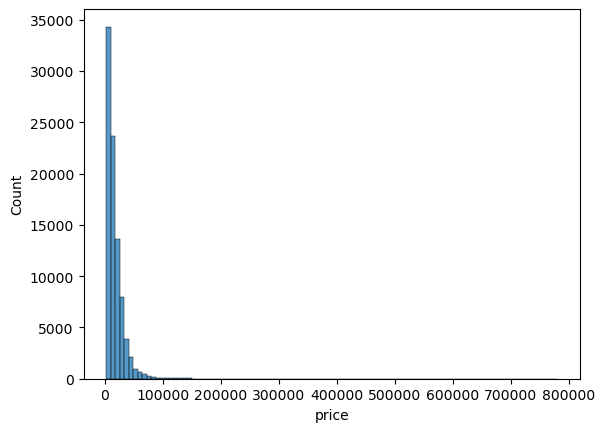

In [44]:
sns.histplot(df['price'], bins=100)

The original `price` variable exhibits a **heavily right-skewed distribution**, as shown in the left histogram. Most car listings are priced below 50KUSD, but a small number of high-end vehicles reach prices beyond 400KUSD, **stretching the scale and introducing extreme outliers**.

---

To address this, we can apply a **logarithmic transformation**. This transformation:

- Compresses extreme values,
- Improves normality and distribution symmetry,
- Enhances numerical stability for modeling,
- Reduces the influence of outliers.

In [46]:
import numpy as np
df['log_price'] = np.log(df['price']+1)

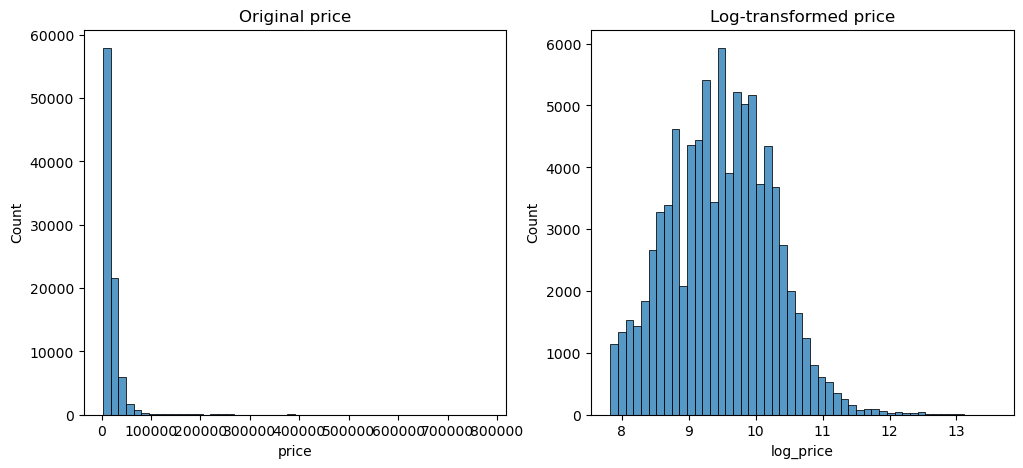

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['price'], bins=50, ax=axes[0])
axes[0].set_title("Original price")

sns.histplot(df['log_price'], bins=50, ax=axes[1])
axes[1].set_title("Log-transformed price")

plt.savefig("../outputs/visuals/Price vs Log_Price.png", dpi=300)
plt.show()

The right histogram shows that the transformed `log_price` is **more bell-shaped and closer to a normal distribution**, which is great for:

- **Correlation analysis** (Pearson’s r requires linearity and homoscedasticity),
- **Regression models** (better assumptions about residuals),
- **Anomaly detection and clustering** (distance-based metrics perform better).

Overall, this transformation prepares the data for more **reliable and interpretable machine learning and statistical analysis**.


### Correlation analysis on Numerical features

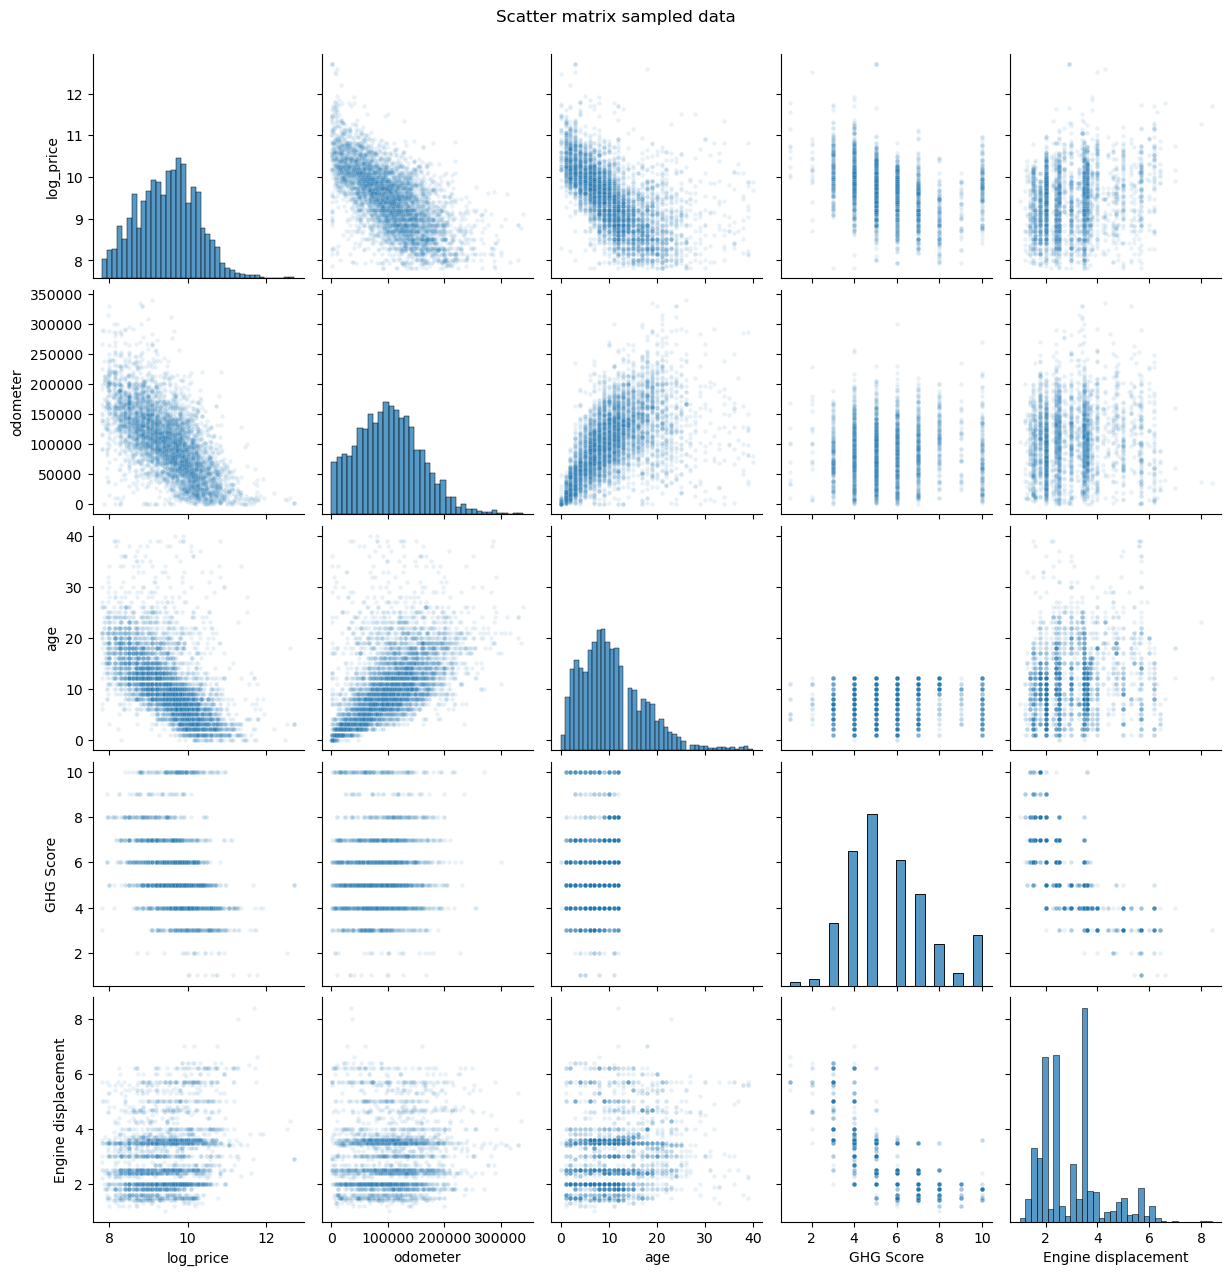

In [50]:
sample_df = df.sample(n=5000, random_state=42)

sns.pairplot(sample_df[['log_price', 'odometer', 'age','GHG Score','Engine displacement']], plot_kws={'alpha': 0.1, 's': 10})
plt.suptitle("Scatter matrix sampled data", y=1.02)
plt.savefig("../outputs/visuals/Scatter matrix.png", dpi=300)
plt.show()

After cleaning and sampling the dataset, we can visualize the scatter matrix of some meaningful numerical variables (`log_price`, `odometer`, `age`, `GHG Score`,`Engine displacement`).

Here are the main takeaways:

- **Price vs Odometer**: We observe a clear **negative relationship** — more expensive cars tend to have lower mileage.
- **Price vs Age**: There’s a visible **negative correlation** — newer cars generally cost more.
- **Odometer vs Age**: A **strong relationship** — older vehicles naturally have higher mileage.
- A few **outliers** remain (e.g., older cars with very low mileage), but they are limited.

---


To complement this visual inspection, we’ll now compute and plot a **correlation heatmap**.  
This will help us quantify the linear relationships between the numerical features and validate the trends we’ve observed visually.


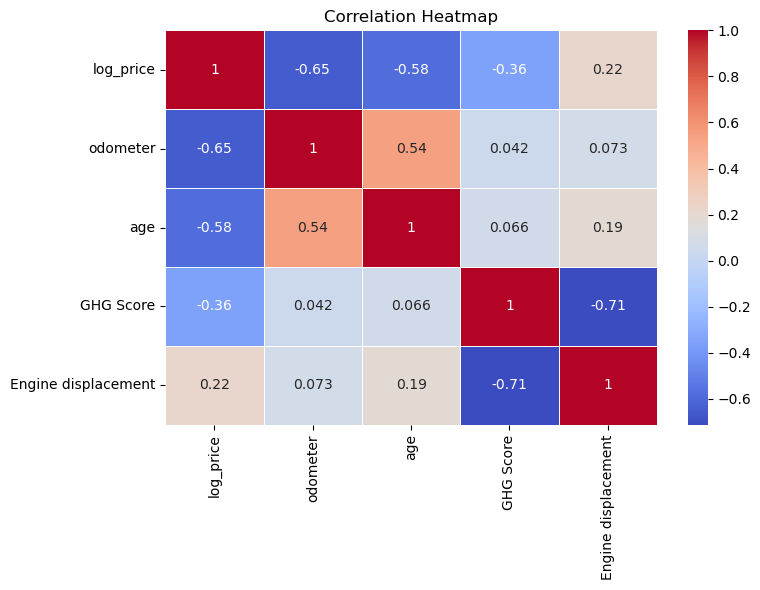

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['log_price', 'odometer', 'age','GHG Score','Engine displacement']

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../outputs/visuals/correlation_heatmap.png", dpi=300)
plt.show()

The heatmap reveals meaningful relationships between the numerical variables in the dataset:

- **Price vs Odometer** → **-0.65**  
  There's a strong negative correlation: **the more a car has been driven, the lower its price** tends to be.

- **Price vs Age** → **-0.58**  
  As expected, **older cars tend to be less expensive**, though the correlation is slightly weaker than with odometer.

- **Odometer vs Age** → **+0.54**  
  A positive correlation showing that **older cars generally have more mileage**, which totally makes sense.

- **Engine Displacement vs GHG Score** → **-0.71**  
  This is the **strongest negative correlation** observed. It confirms that **larger engines have a high negative impact on GHG Score**, due to higher fuel consumption and emissions.

- **GHG Score vs Price** → **-0.36**  
  Interestingly, **cars with a high GHG Score tend to be cheaper** on the US used car market.

These insights mostly confirm expected patterns in the used car ecosystem and also **validate the effectiveness of our previous data cleaning steps**.


### Distribution over the US Regions

Let's have a look at how our listings are represented through the US Cities:

Here we are showing the **makes having the most cars being selled by Cities**. We limited to the **top 15 make**s which is constitues by:
- **Japanese cars**:  `Toyota` / `Honda` / `Nissan` / `Subaru` / `Lexus`.
- **Amercian cars**: `Ford` / `Chevrolet` / `Jeep` /`Dodge` / `GMC`.
- **German cars**: `BMW`, `Mercedes`, `Audi`.

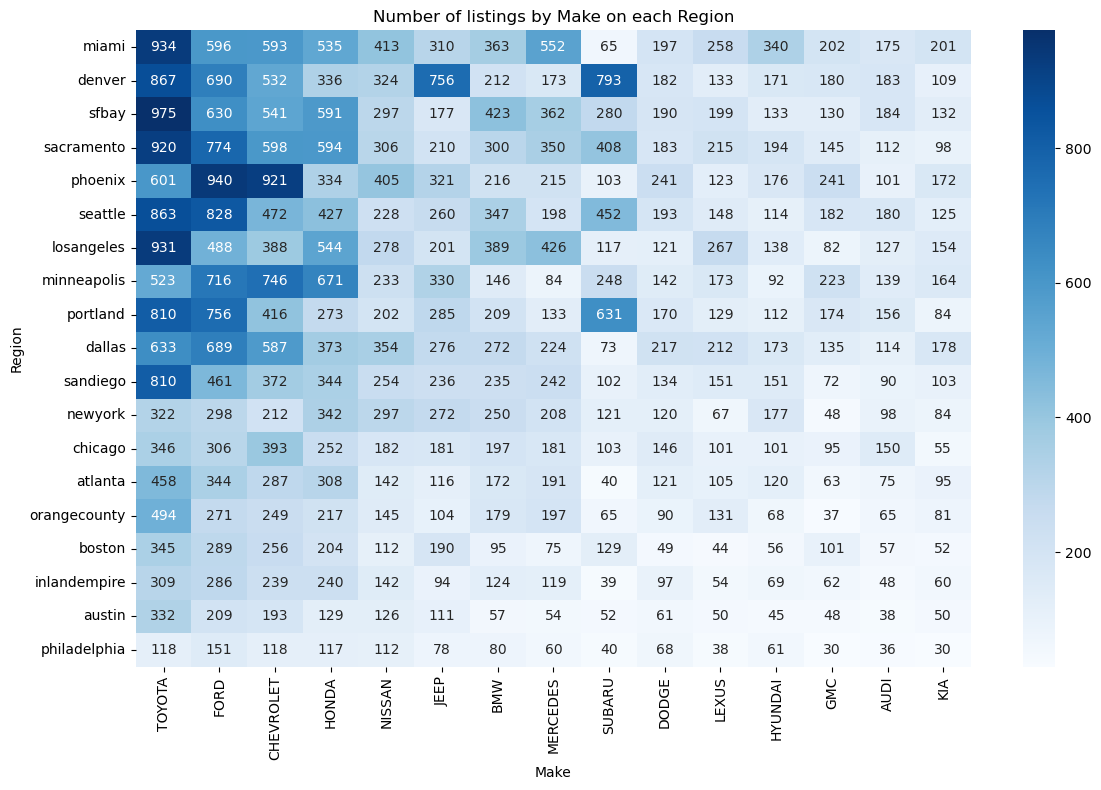

In [56]:
region_make_counts = df.groupby(['region', 'make_mapped']).size().unstack(fill_value=0)

region_order = region_make_counts.sum(axis=1).sort_values(ascending=False).index
region_make_counts = region_make_counts.loc[region_order]

top_makes = region_make_counts.sum(axis=0).sort_values(ascending=False).head(15).index
heatmap_data = region_make_counts[top_makes]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title("Number of listings by Make on each Region")
plt.xlabel("Make")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


#### Focus on Subaru

I noticed something intersting with Subaru: it seems like some specific cities has much more Subarus than the others. 

Let's have a look.

---

We can start by plotting the **number of listings by state**. 

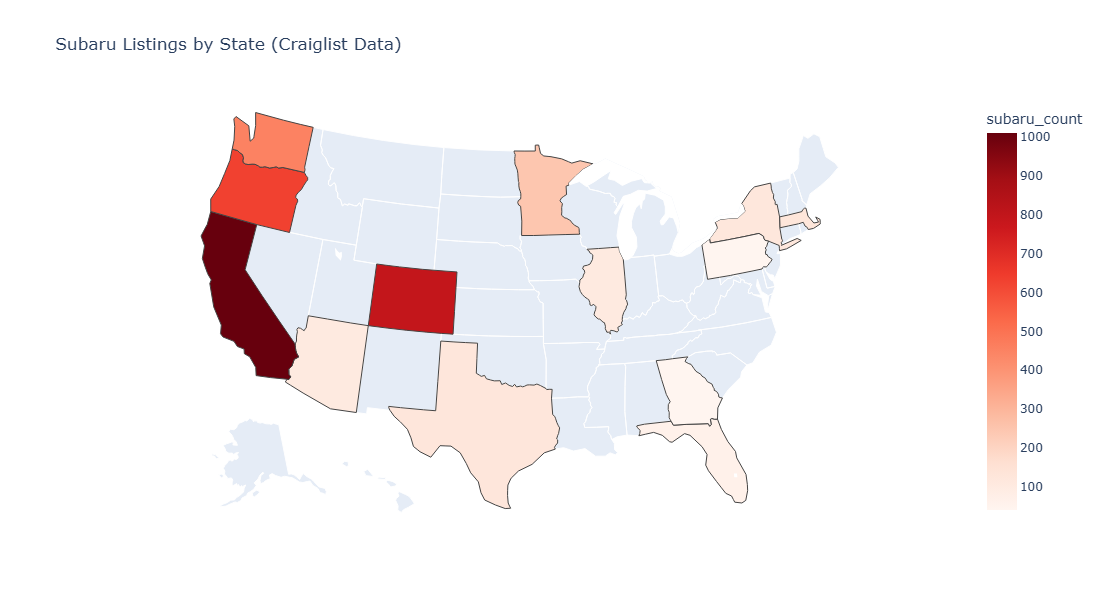

In [58]:
import pandas as pd
import plotly.express as px

region_to_state = {
    'atlanta': 'GA',
    'austin': 'TX',
    'boston': 'MA',
    'chicago': 'IL',
    'dallas': 'TX',
    'denver': 'CO',
    'inlandempire': 'CA',
    'losangeles': 'CA',
    'miami': 'FL',
    'minneapolis': 'MN',
    'newyork': 'NY',
    'orangecounty': 'CA',
    'philadelphia': 'PA',
    'phoenix': 'AZ',
    'portland': 'OR',
    'sacramento': 'CA',
    'sandiego': 'CA',
    'seattle': 'WA',
    'sfbay': 'CA'
}

df['state'] = df['region'].map(region_to_state)

subaru_df = df[df['make_mapped'] == 'SUBARU']

subaru_by_state = subaru_df.groupby('state').size().reset_index(name='subaru_count')

fig = px.choropleth(
    subaru_by_state,
    locations='state',
    locationmode='USA-states',
    color='subaru_count',
    scope='usa',
    color_continuous_scale='Reds',
    title='Subaru Listings by State (Craiglist Data)',
    width=1000,
    height=600
)

fig.show()

The West / Mid-West has much more of thoses cars. It can be explained by a large used cars market for states like California.

It will be more appropriate to look at the proportion of Subaru out of the total listings for each city.

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_19164\2515770021.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




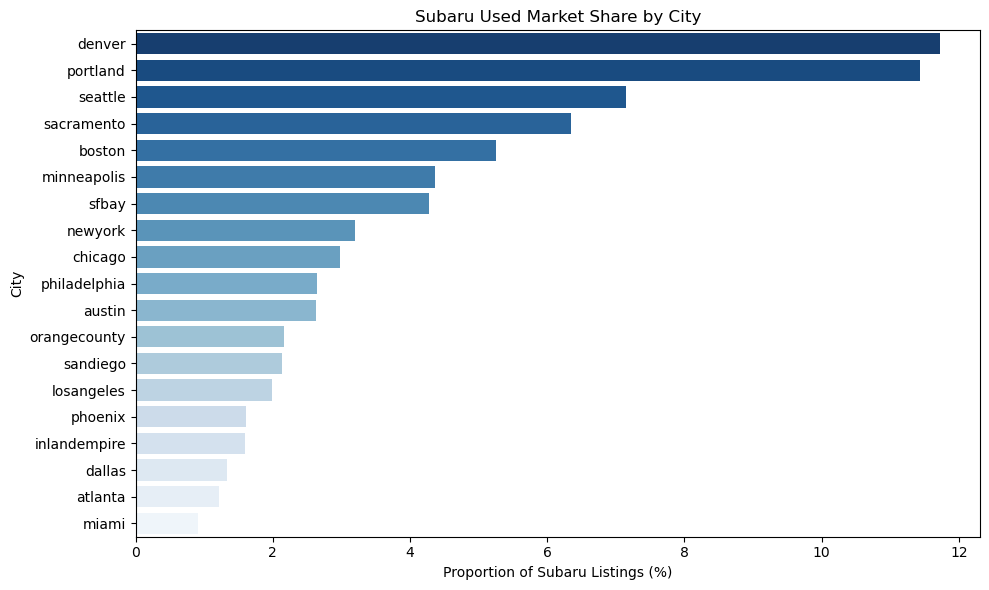

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


total_by_region = df.groupby('region').size()
subaru_by_region = subaru_df.groupby('region').size()


subaru_ratio = 100*(subaru_by_region / total_by_region).fillna(0).sort_values(ascending=False)
subaru_ratio_df = subaru_ratio.reset_index()
subaru_ratio_df.columns = ['region', 'subaru_ratio']


plt.figure(figsize=(10, 6))
sns.barplot(x='subaru_ratio', y='region', data=subaru_ratio_df, palette= 'Blues_r')
plt.title('Subaru Used Market Share by City')
plt.xlabel('Proportion of Subaru Listings (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


Subaru represent more than **10% of the used car market** in `Denver` and `Portland`.

`Seattle`, `Sacramento`, `Boston` have also a **non-negligeable proportion** of Subarus.

---
Finally, we can dive into the **models of Subaru** and map it to the top cities.

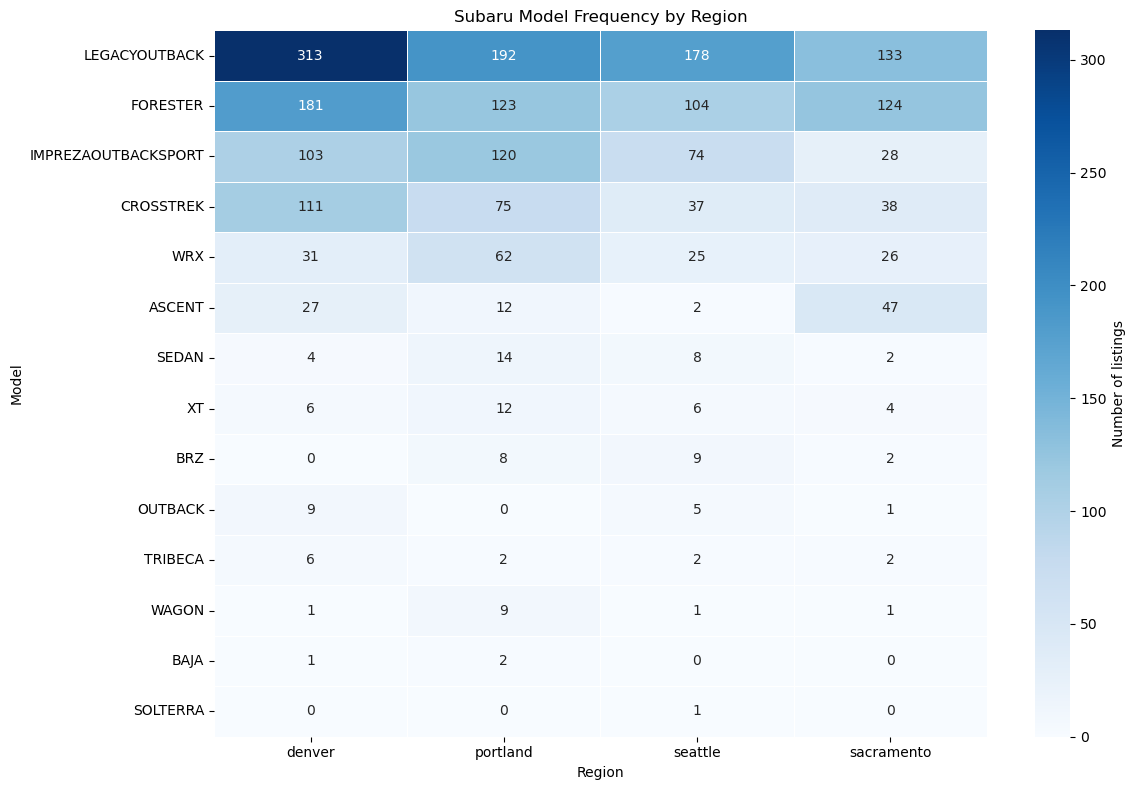

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

subaru_df_top_region = df[(df['make_mapped'] == 'SUBARU') & (df['region'].isin([
    'denver', 'portland', 'seattle', 'sacramento'
]))]

crosstab = pd.crosstab(subaru_df_top_region['model'], subaru_df_top_region['region'])
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]
crosstab = crosstab[crosstab.sum(axis=0).sort_values(ascending=False).index]

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap="Blues", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of listings'})
plt.title("Subaru Model Frequency by Region")
plt.xlabel("Region")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


the `Outback` and the `Forester` are the **most selled car on Craiglist**, `CrossTrek` is right after.

### Statisical Mode Profile

In [65]:
df.describe(include= 'all')

,url,title,seller,price,location,year,makemodel,condition,cylinders,drive,...,GHG Score,Unrounded Highway Mpg For Fuel Type1,ATV Type,Electric motor,Start-Stop,Day,age,date,log_price,state
count,88811,88811,88787,88811.0,76779,88811.000000,88811,52584,64953,69069,...,36854.000000,55259.000000,8917,4802,37870,88811,88811.000000,88811,88811.0,88811
unique,88811,63903,2,<NA>,7632,NaN,11063,6,8,3,...,NaN,NaN,7,140,2,7,NaN,31,<NA>,13
top,https://atlanta.craigslist.org/atl/ctd/d/ada-2...,2023 Toyota Camry SE Sedan,dealer,<NA>,Call *(720,NaN,FORDF150,excellent,4 cylinders,4wd,...,NaN,NaN,Hybrid,202V Ni-MH,N,Friday,NaN,2025-07-03,<NA>,CA
freq,1,57,64976,<NA>,1227,NaN,1238,31856,28897,31685,...,NaN,NaN,3138,944,24462,16714,NaN,7027,<NA>,29100
mean,NaN,NaN,NaN,17852.481787,NaN,2014.280573,NaN,NaN,NaN,NaN,...,5.569572,24.062424,NaN,NaN,NaN,NaN,10.719427,NaN,9.482936,NaN
min,NaN,NaN,NaN,2500.0,NaN,1985.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,7.824446,NaN
25%,NaN,NaN,NaN,7500.0,NaN,2011.000000,NaN,NaN,NaN,NaN,...,4.000000,17.779600,NaN,NaN,NaN,NaN,6.000000,NaN,8.922792,NaN
50%,NaN,NaN,NaN,13500.0,NaN,2015.000000,NaN,NaN,NaN,NaN,...,5.000000,26.063600,NaN,NaN,NaN,NaN,10.000000,NaN,9.510519,NaN
75%,NaN,NaN,NaN,22599.0,NaN,2019.000000,NaN,NaN,NaN,NaN,...,7.000000,32.227200,NaN,NaN,NaN,NaN,14.000000,NaN,10.025705,NaN
max,NaN,NaN,NaN,779980.0,NaN,2025.000000,NaN,NaN,NaN,NaN,...,10.000000,140.137600,NaN,NaN,NaN,NaN,40.000000,NaN,13.567025,NaN


In [66]:
desc = df.describe(include='all')

typical_car = {}

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        typical_car[col] = int(df[col].mean())
    else:
        if 'top' in desc.index:
            typical_car[col] = desc.at['top', col]

typical_car_df = pd.DataFrame([typical_car]).T
typical_car_df.columns = ['Typical Value']
filtered_typical_car = typical_car_df.loc[
    ['seller',
    'make_mapped',
    'model',
    'price',
    'year',
    'condition',
    'drive',
    'fuel',
    'odometer',
    'paint_color',
    'region',
    'title_status',
    'transmission',
    'type',
    'cylinders',
    'fuel',
    'odometer',
    'Unrounded Combined Mpg For Fuel Type1',
    'Annual Fuel Cost For Fuel Type1',
    'GHG Score',
    'Start-Stop',
    'Day']
]
filtered_typical_car

,Typical Value
seller,dealer
make_mapped,TOYOTA
model,F150
price,17852
year,2014
condition,excellent
drive,4wd
fuel,gas
odometer,102944
paint_color,white
